In [1]:
# Chạy lệnh này nếu sử dụng Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load tập train và tập test đã tách từ
import pickle

X_data = pickle.load(open('/content/drive/MyDrive/ML/X_data.pkl', 'rb'))
y_data = pickle.load(open('/content/drive/MyDrive/ML/y_data.pkl', 'rb'))

X_test = pickle.load(open('/content/drive/MyDrive/ML/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/ML/y_test.pkl', 'rb'))

In [3]:
# Tạo mảng biểu diễn tần số xuất hiện của các từ trong tập train
n = len(X_data)

word_dict = {}
document_len = []

for doc in X_data:
  text = doc.split(' ')
  document_len.append(len(text))
  for word in text:
    if word in word_dict.keys():
      word_dict[word] += 1
    else:
      word_dict[word] = 1

In [4]:
# Liệt kê 100 stopword 
sorted_frequency_words = sorted(word_dict.items(), key=lambda x:x[1])

stop_words = []
for word in sorted_frequency_words[-100:]:
  stop_words.append(word[0])
print("100 stop words xuất hiện nhiều nhất trong bộ dữ liệu: ", stop_words)

100 stop words xuất hiện nhiều nhất trong bộ dữ liệu:  ['việt', 'cần', 'học', 'cùng', 'thi', 'nào', 'mỹ', 'cao', 'trận', 'cô', 'đồng', 'điểm', 'do', 'gì', 'tháng', 'rằng', 'bóng', 'chưa', 'bộ', 'thứ', 'lần', 'trường', 'nam', 'nói', 'hay', 'nên', 'cả', 'bằng', 'nước', 'nếu', 'vì', 'khác', 'qua', 'phim', 'tới', 'đội', 'vẫn', 'việc', 'đây', 'lên', 'biết', 'họ', 'đang', 'ông', 'đi', 'bị', 'ngày', 'nhất', 'mới', 'mà', 'sự', 'theo', 'hai', 'thì', 'trước', 'nhà', 'có_thể', 'bạn', 'mình', 'rất', 'hơn', 'chỉ', 'làm', 'lại', 'còn', 'sau', 'tại', 'ra', 'trên', 'năm', 'anh', 'từ', 'như', 'nhưng', 'đó', 'nhiều', 'phải', 'về', 'đến', 'vào', 'cũng', 'tôi', 'sẽ', 'để', 'này', 'khi', 'người', 'đã', 'những', 'với', 'không', 'cho', 'được', 'một', 'các', 'trong', 'có', 'là', 'và', 'của']


In [5]:
# Loại bỏ stopword trong tập train
new_X_data = []
new_document_len = []
for i in range (0, len(X_data)):
  text = X_data[i].split(' ')
  new_text = ""
  for word in text:
    if word in stop_words:
      continue
    else:
      new_text += word
      new_text += ' '
  new_X_data.append(new_text)
  new_document_len.append(len(new_text.split(' ')))

In [6]:
# Loại bỏ stopword trong tập test
new_X_test = []
new_test_document_len = []
for i in range (0, len(X_test)):
  text = X_test[i].split(' ')
  new_text = ""
  for word in text:
    if word in stop_words:
      continue
    else:
      new_text += word
      new_text += ' '
  new_X_test.append(new_text)
  new_test_document_len.append(len(new_text.split(' ')))

In [7]:
# Hiển thị một văn bản sau khi đã loại bỏ stop words
new_X_data[100]

'mua bản_quyền ca_khúc ngoại chờ ca_sĩ vào_cuộc ca_sĩ tâm sở văn_hoá thông_tin tp hcm phép mua bản_quyền ca_khúc harem bản_gốc cancão mar pháp mua bản_quyền ca_khúc nước_ngoài thuận chờ háo_hức nhập_cuộc ca_sĩ nữa thôi khá nhanh ca_sĩ tâm lên_tiếng sở vh tt tp hcm sửa_sai tấm giấy_phép phép hát lời ca_khúc văn_bản phép sử_dụng tác_giả ca_khúc tấm giấy_phép harem trở_thành ca_khúc hợp_pháp mách_nước bạn_bè giới dự_định mua ca_khúc nước_ngoài tâm chỉ_dẫn trang_web songfile com ca_sĩ click chọn ca_khúc chọn tên tác_giả tên album hoặc tên ca_sĩ trình_bày thực_hiện yêu_cầu cuối_cùng thanh_toán mã_số tài_khoản tiền bản_quyền ca_khúc songfile com tính số_lượng đĩa phát_hành đĩa phát_hành số_lượng thấp cd nộp khoảng usd phát_hành số_lượng gấp đôi gấp ba tùy con_số cụ_thể khâu ngoại xin xong nội xin giấy_phép bản_quyền cá_nhân hoặc đại_diện hãng đĩa nơi phát_hành album ca_sĩ trách_nhiệm sở vh tt xin giấy_phép sở vh tt kiểm_tra rõ nguồn_gốc xuất_xứ ca_khúc giấy_tờ liên_quan xác_định bài hát phép

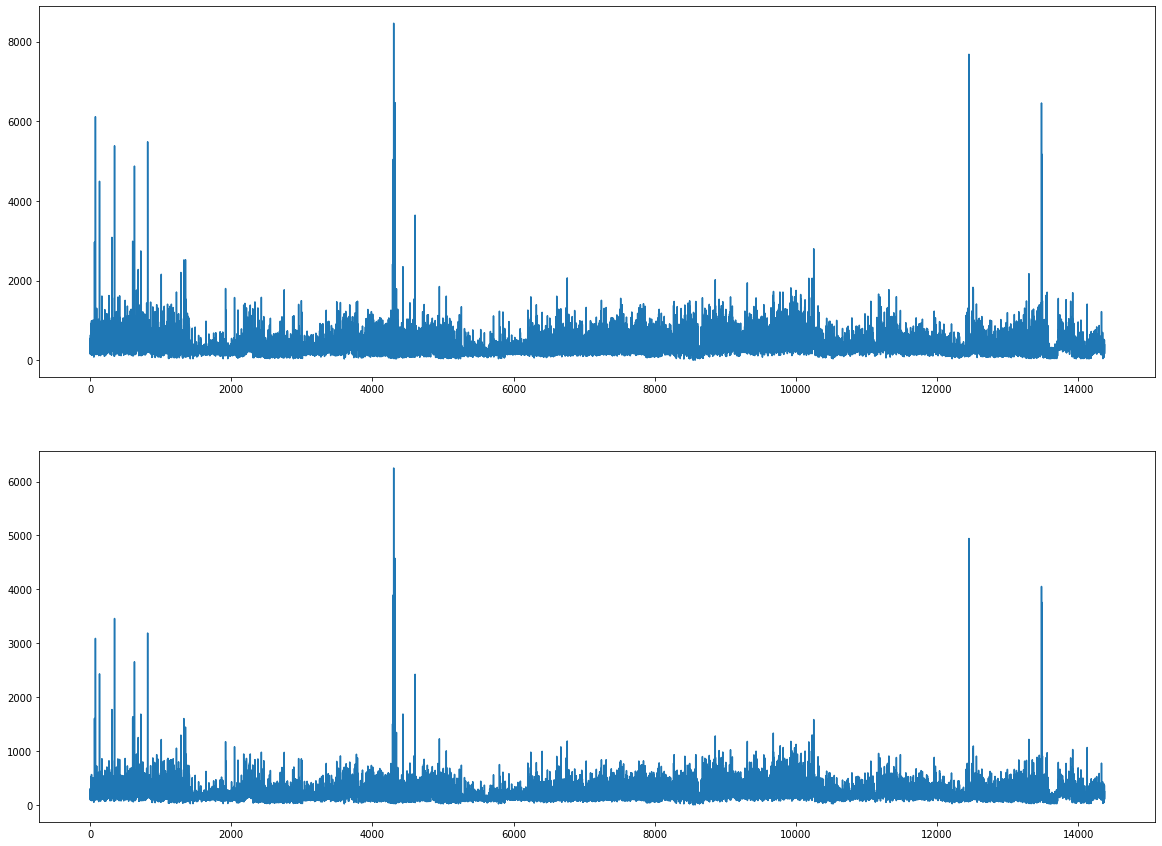

In [8]:
# Hiển thị phân bố độ dài văn bản trước và sau khi loại bỏ stop words
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, figsize=(20, 15))
axs[0].plot(document_len)
axs[1].plot(new_document_len)

In [9]:
# Tính TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, analyzer='word', max_features=30000)
tfidf_vect.fit(new_X_data)

TfidfVectorizer(max_df=0.5, max_features=30000, ngram_range=(1, 2))

In [10]:
# Tính TF-IDF
X_data_tfidf =  tfidf_vect.transform(new_X_data)
X_test_tfidf =  tfidf_vect.transform(new_X_test)

In [11]:
# Giảm chiều dữ liệu bằng SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)

X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

In [14]:
# Mã hóa label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)
y_data_n[1001]

5

In [15]:
import sklearn
from sklearn import naive_bayes as nb
from sklearn.metrics import accuracy_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [16]:
#Thử nghiệm để tìm tham số tốt nhất cho thuật toán k-nearest-neighbor
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Mảng lưu kết quả thí nghiệm
val_acc = []
val_f1 = []
train_acc = []
train_f1 = []
# Mảng lưu các tham số k 
arr = [3,5,7,9,11,15,19,25,31]

X_train, X_val, y_train, y_val = train_test_split(X_data_tfidf_svd, np.array(y_data_n), test_size=0.2, random_state=42)

for k in arr:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_predictions = knn.predict(X_train)
  val_predictions = knn.predict(X_val)
  val_acc.append(accuracy_score(val_predictions, y_val))
  train_acc.append(accuracy_score(train_predictions, y_train))
  val_f1.append(f1_score(val_predictions, y_val, average='weighted'))
  train_f1.append(f1_score(train_predictions, y_train, average='weighted'))

In [17]:
val_f1

[0.8422944054997258,
 0.8421471643847523,
 0.8434229282255119,
 0.842545957246162,
 0.8414677282287791,
 0.8398301840246614,
 0.8330497183080761,
 0.8282119048593631,
 0.8275115332034643]

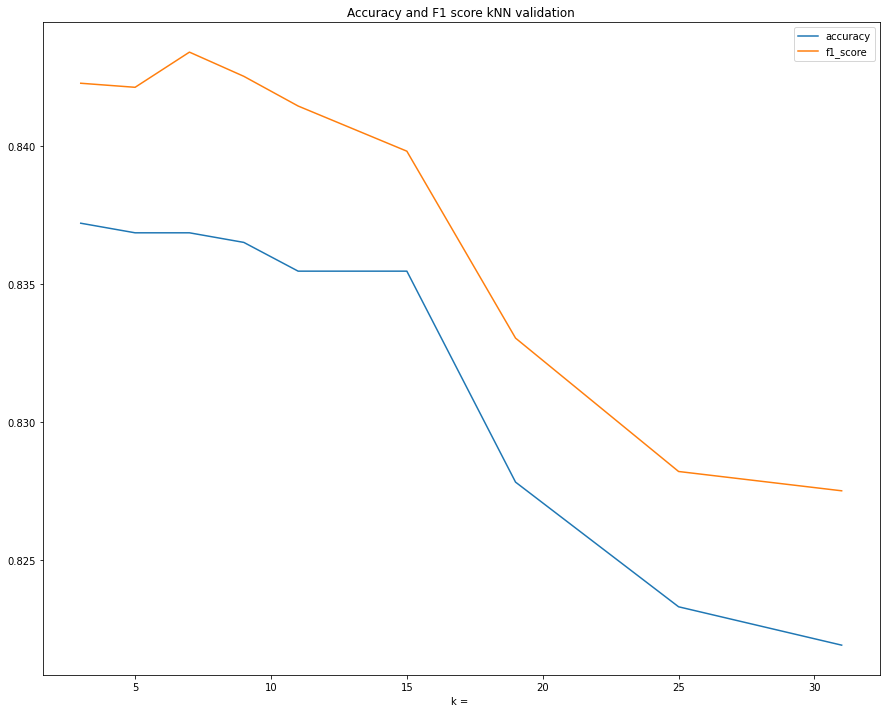

In [18]:
# Biểu đồ minh họa đối với tập validation
plt.figure(figsize=(15,12))
plt.plot(arr, val_acc)
plt.plot(arr, val_f1)
plt.title('Accuracy and F1 score kNN validation')
plt.ylabel('')
plt.xlabel('k = ')
plt.legend(['accuracy', 'f1_score'], loc='upper right')
plt.show()

In [19]:
# Thử nghiệm với Naive Bayes
# bộ tham số alpha
alphas = [0.000001, 0.00001, 0.0001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
# Mảng lưu kết quả thí nghiệm
val_acc = []
val_f1 = []
train_acc = []
train_f1 = []

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_data_tfidf, y_data, test_size=0.1, random_state=42)

for alpha in alphas:
  model=nb.MultinomialNB(alpha=alpha, fit_prior=True)

  model.fit(X_train, y_train)

  train_predictions = model.predict(X_train)
  val_predictions = model.predict(X_val)
  val_acc.append(accuracy_score(val_predictions, y_val))
  train_acc.append(accuracy_score(train_predictions, y_train))
  val_f1.append(f1_score(val_predictions, y_val, average='weighted'))
  train_f1.append(f1_score(train_predictions, y_train, average='weighted'))

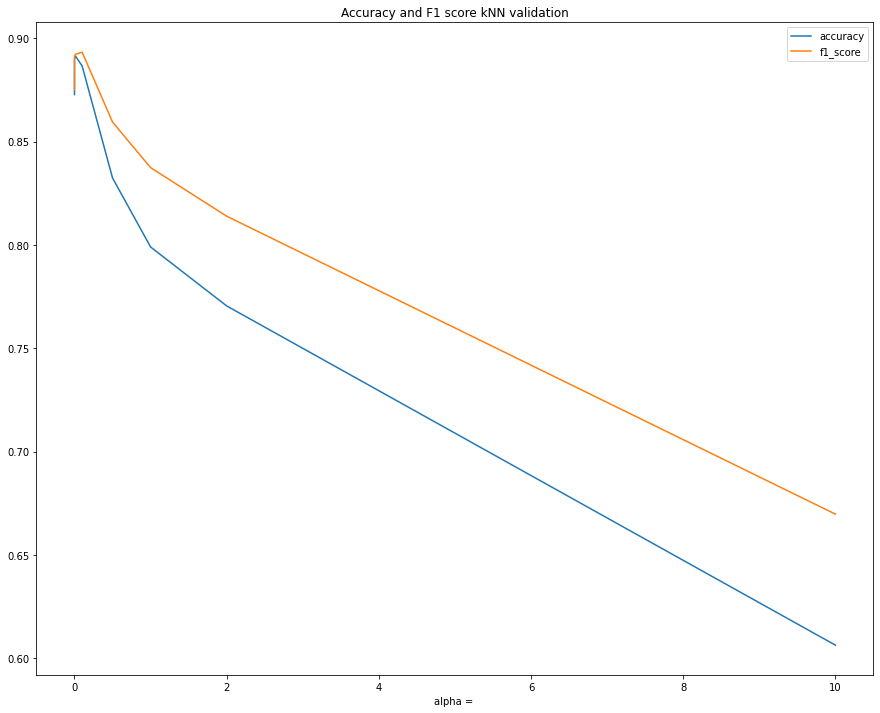

In [20]:
# Biểu đồ minh họa đối với tập validation
plt.figure(figsize=(15,12))
plt.plot(alphas, val_acc)
plt.plot(alphas, val_f1)
plt.title('Accuracy and F1 score kNN validation')
plt.ylabel('')
plt.xlabel('alpha = ')
plt.legend(['accuracy', 'f1_score'], loc='upper right')
plt.show()

In [21]:
# Train với Naive Bayes
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_data_tfidf, y_data, test_size=0.1, random_state=42)
model=nb.MultinomialNB(alpha=0.01, fit_prior=True)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test_tfidf)

print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))
print("Test accuracy: ", sklearn.metrics.accuracy_score(test_predictions, y_test))

Validation accuracy:  0.8915159944367177
Test accuracy:  0.8920172242464393


In [22]:
# Tính k-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.89567233 0.90030912 0.90417311 0.89335394 0.89567233 0.90340031
 0.90185471 0.89636504 0.89095128 0.91105955]
Average cross-validation score: 0.8993


In [23]:
x=500
print(X_test[x])
print(test_predictions[x])
print(y_data_n[x])

đoan_trang tự_tin với tuyết rơi mùa hè lần đầu tham_dự vtv bài hát tôi yêu không được giải và bị chìm_nghỉm trước nhiều ca_sĩ lần này đoan_trang vẫn không nản_lòng dự giải với bài hát tuyết rơi mùa hẹ clip được quay bởi đạo_diễn người nước_ngoài jackie chen tại_sao chị lại chọn ca_khúc tuyết rơi mùa hè để tham_dự vtv bài hát tôi yêu đây là ca_khúc nằm trong album riêng bốn mùa tình_yêu của tôi ca_khúc có những giai_điệu thật lãng_mạn ca từ lại rất dễ_thương nói về một câu_chuyện tình giản_dị trong_sáng với ca_khúc này tôi đã được khán_giả đón_nhận và bầu_chọn trong top làn_sóng xanh làm_việc với đạo_diễn jackie chị gặp những khó_khăn gì tôi đã làm_việc với jackie một lần trước khi anh làm đạo_diễn quảng_cáo cho lip ice lúc đầu làm_việc cả hai cùng sử_dụng tiếng anh tôi cũng không gặp nhiều khó_khăn vì đã tốt_nghiệp đại_học ngoại_ngữ cách diễn_đạt của jackie dễ hiểu nhưng qua một thời_gian làm_việc tôi mới biết anh nói tiếng việt rất giỏi chị nhận_xét thế_nào về đạo_diễn người nước_ngoà

In [24]:
from keras.layers import Dense, Input, Dropout
from keras import models, optimizers

In [25]:
# Model DNN
def create_dnn_model():
    input_layer = Input(shape=(300,))
    layer = Dense(1024, activation='relu')(input_layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(256, activation='sigmoid')(layer)
    layer = Dense(64, activation='relu')(layer)
    output_layer = Dense(27, activation='softmax')(layer)
    
    classifier = models.Model(input_layer, output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

In [26]:
import matplotlib.pyplot as plt
def plot_history(history):
  print(history.history.keys())
# summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [27]:
# Biến đổi label sang dạng one-hot vector
import numpy as np

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)
y_train_onehot = onehot.fit_transform(np.array(y_data).reshape(-1,1))
y_test_onehot = onehot.fit_transform(np.array(y_test).reshape(-1,1))
print(len(y_train_onehot))
print(len(y_test_onehot))

14375
12076


In [28]:
# Tách tập train thành tập train và vaidation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_data_tfidf_svd, np.array(y_train_onehot), test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)

(12937, 300)
(12937, 27)


In [29]:

# Train model
model_dnn=create_dnn_model()
model_dnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_dnn.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=1)

Epoch 1/10
283/283 [==============================] - 6s 17ms/step - loss: 1.3848 - accuracy: 0.6276 - val_loss: 0.5545 - val_accuracy: 0.8485
Epoch 2/10
283/283 [==============================] - 4s 15ms/step - loss: 0.4278 - accuracy: 0.8760 - val_loss: 0.4675 - val_accuracy: 0.8627
Epoch 3/10
283/283 [==============================] - 4s 15ms/step - loss: 0.3192 - accuracy: 0.9023 - val_loss: 0.4335 - val_accuracy: 0.8738
Epoch 4/10
283/283 [==============================] - 4s 15ms/step - loss: 0.2637 - accuracy: 0.9196 - val_loss: 0.4240 - val_accuracy: 0.8730
Epoch 5/10
283/283 [==============================] - 4s 15ms/step - loss: 0.2133 - accuracy: 0.9353 - val_loss: 0.4567 - val_accuracy: 0.8735
Epoch 6/10
283/283 [==============================] - 4s 15ms/step - loss: 0.1750 - accuracy: 0.9442 - val_loss: 0.4519 - val_accuracy: 0.8764
Epoch 7/10
283/283 [==============================] - 5s 16ms/step - loss: 0.1521 - accuracy: 0.9526 - val_loss: 0.5126 - val_accuracy: 0.8673

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


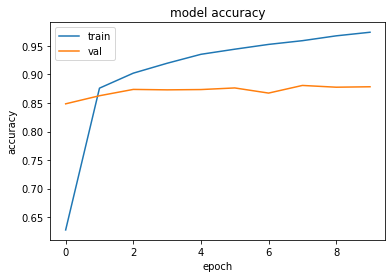

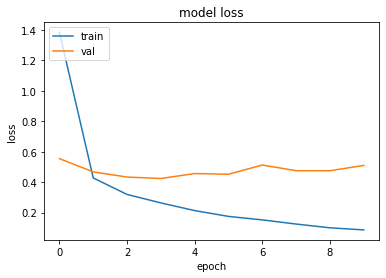

378/378 [==============================] - 3s 8ms/step - loss: 0.5292 - accuracy: 0.8705


[0.529159665107727, 0.8704869151115417]

In [30]:
# Đánh giá model
plot_history(history)
model_dnn.evaluate(X_val, y_val)
model_dnn.evaluate(X_test_tfidf_svd, y_test_onehot)

In [31]:
y_pred = model_dnn.predict(X_test_tfidf_svd)

378/378 [==============================] - 3s 8ms/step


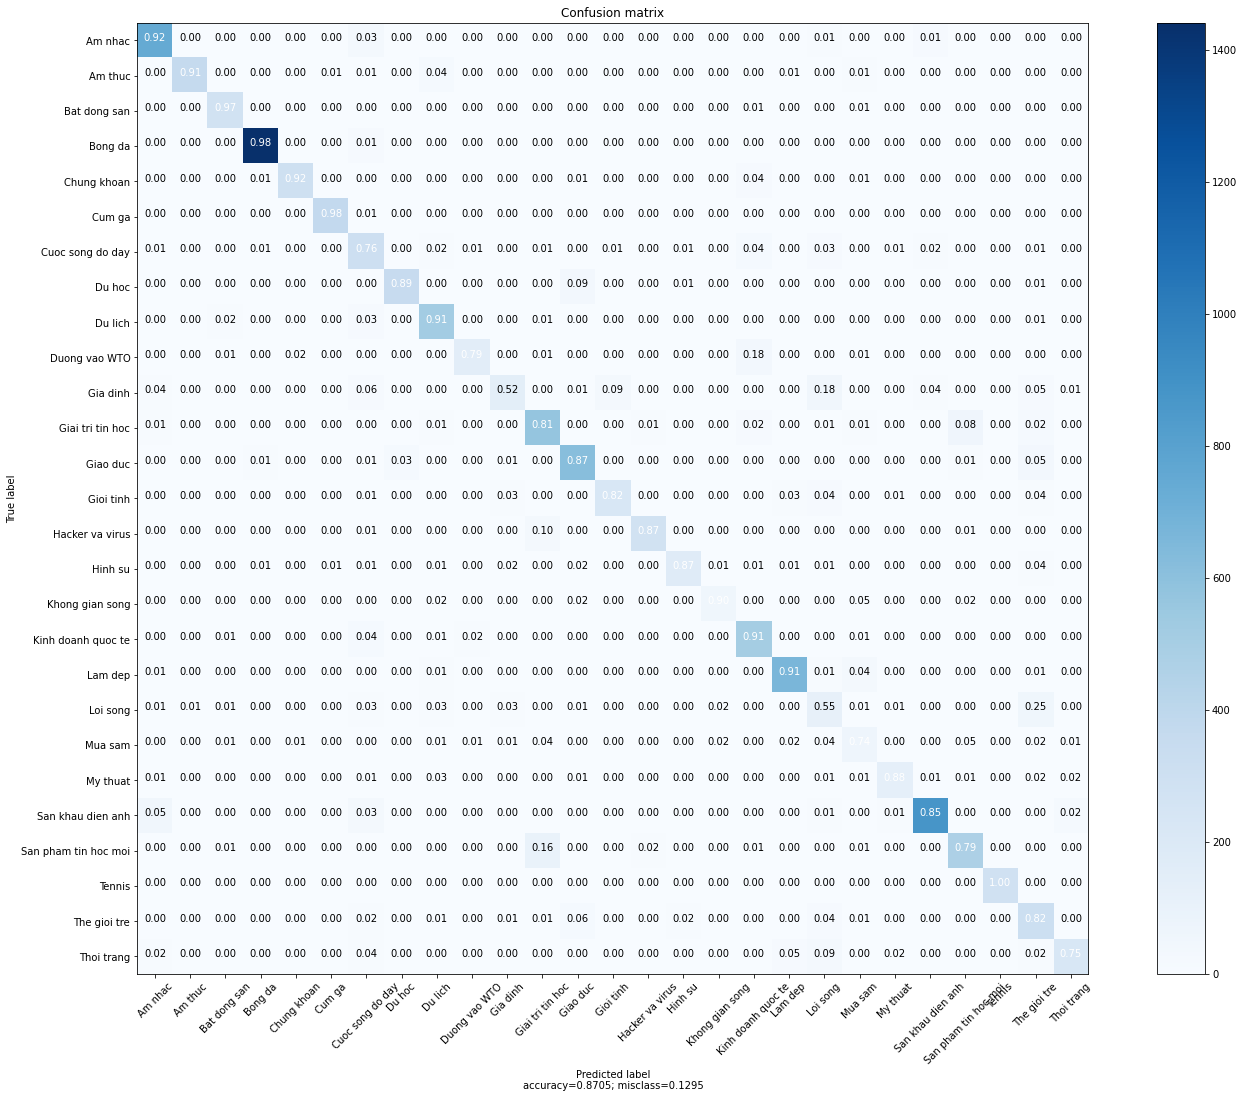

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd

index_array = ['Am nhac', 'Am thuc', 'Bat dong san', 'Bong da', 'Chung khoan', 'Cum ga', 'Cuoc song do day', 'Du hoc', 'Du lich', 'Duong vao WTO', 
              'Gia dinh', 'Giai tri tin hoc', 'Giao duc', 'Gioi tinh', 'Hacker va virus', 'Hinh su', 'Khong gian song', 'Kinh doanh quoc te', 
              'Lam dep', 'Loi song', 'Mua sam', 'My thuat', 'San khau dien anh', 'San pham tin hoc moi', 'Tennis', 'The gioi tre', 'Thoi trang']
y_test_new = np.array(y_test_n)
y_pred_new = y_pred.argmax(axis=-1)

cm = confusion_matrix(y_test_new, y_pred_new)
df_cm = pd.DataFrame(cm, range(27), range(27))

# Confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm=cm, target_names=index_array)